<a href="https://colab.research.google.com/github/stalin99835/DUDL/blob/main/DUDL_overfitting_regressionMVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# COURSE: A deep understanding of deep learning
## SECTION: Overfitting, cross-validation, regularization
### LECTURE: Cross-validation on regression
#### TEACHER: Mike X Cohen, sincxpress.com
##### COURSE URL: udemy.com/course/deeplearning_x/?couponCode=202401

In [72]:
# import libraries
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# Create the data and the model

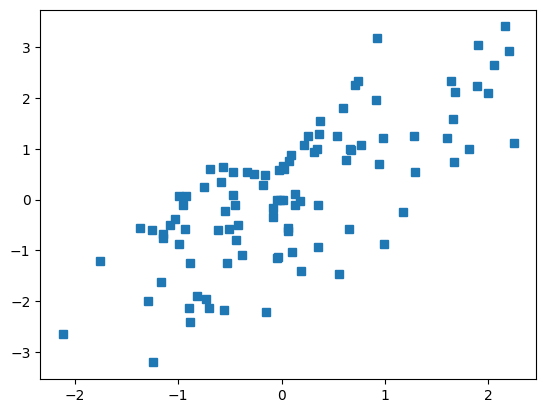

In [73]:
N = 100
x = torch.randn(N,1)
y = x + torch.randn(N,1)

# and plot
plt.plot(x,y,'s')
plt.show()

In [85]:
# build model
ANNreg = nn.Sequential(
    nn.Linear(1,4),  # input layer
    nn.ReLU(),       # activation function
    nn.Linear(4,1)   # output layer
    )

In [86]:
# model meta-parameters

learningRate = .1

# loss function
lossfun = nn.MSELoss()

# optimizer
optimizer = torch.optim.SGD(ANNreg.parameters(),lr=learningRate)

# Select data for training

In [ ]:
# select training data (note the hard-coded N!)
trainSet = int(N*.8)
trainidx  = np.random.choice(range(N),trainSet,replace=False) # random indices
trainBool = np.zeros(N,dtype=bool) # initialize vector of Falses'
trainBool[trainidx] = True # set selected samples to True
trainBoolT = torch.tensor(trainBool,dtype=torch.bool)

# show the sizes
print(x[trainBool].shape)
print(x[~trainBool].shape)

torch.Size([80, 1])
torch.Size([20, 1])


In [76]:
data_train,data_test,label_train,label_test = train_test_split(x,y,train_size=.8,shuffle=False)

print(data_train.shape)
print(data_test.shape)

print(label_train.shape)
print(label_test.shape)
n=1

print(x[n],y[n])
print(data_train[n],label_train[n])

torch.Size([80, 1])
torch.Size([20, 1])
torch.Size([80, 1])
torch.Size([20, 1])
tensor([-1.1500]) tensor([-0.6848])
tensor([-1.1500]) tensor([-0.6848])


# Train the model

train loss
[tensor(0.8239), tensor(0.8239), tensor(0.8239), tensor(0.8239), tensor(0.8239), tensor(0.8239), tensor(0.8239), tensor(0.8239), tensor(0.8239), tensor(0.8239), tensor(0.8239), tensor(0.8239), tensor(0.8239), tensor(0.8239), tensor(0.8239), tensor(0.8239), tensor(0.8239), tensor(0.8239), tensor(0.8239), tensor(0.8239), tensor(0.8239), tensor(0.8239), tensor(0.8239), tensor(0.8239), tensor(0.8239), tensor(0.8239), tensor(0.8239), tensor(0.8239), tensor(0.8239), tensor(0.8239), tensor(0.8239), tensor(0.8239), tensor(0.8239), tensor(0.8239), tensor(0.8239), tensor(0.8239), tensor(0.8239), tensor(0.8239), tensor(0.8239), tensor(0.8239), tensor(0.8239), tensor(0.8239), tensor(0.8239), tensor(0.8239), tensor(0.8239), tensor(0.8239), tensor(0.8239), tensor(0.8239), tensor(0.8239), tensor(0.8239), tensor(0.8239), tensor(0.8239), tensor(0.8239), tensor(0.8239), tensor(0.8239), tensor(0.8239), tensor(0.8239), tensor(0.8239), tensor(0.8239), tensor(0.8239), tensor(0.8239), tensor(0.823

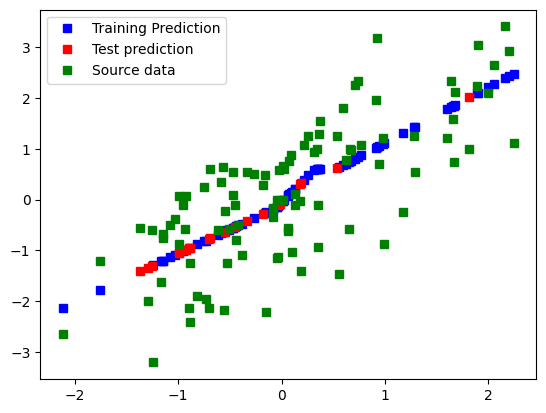

In [108]:
testLoss = []
trainLoss = []

numepochs = 1000
for epochi in range(numepochs):

  # forward pass
  #yHat = ANNreg(x[trainBool])
  yHat = ANNreg(data_train)
  # compute loss
  loss = lossfun(yHat,label_train)
  #print(loss)
  #loss = lossfun(yHat,trainBoolT)
  # backprop
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()
  trainLoss.append(loss.detach())


  #test loss
  predYtest = ANNreg(data_test)
  testloss = (predYtest-label_test).pow(2).mean()
  testLoss.append(testloss.detach())

  #train loss
  #trainLoss = loss.detach()
  #testLoss = testloss.detach()

print('train loss')
print(trainLoss)
print('test loss')
print(testLoss)

plt.plot(data_train.detach(),yHat.detach(),'bs',label='Training Prediction')
plt.plot(data_test.detach(),predYtest.detach(),'rs',label='Test prediction')
plt.plot(x,y,'gs',label='Source data')
plt.legend()
#plt.xlabel('epoch')
#plt.ylabel('loss')
plt.show()



In [ ]:
# report the losses

# compute losses of the TEST set
predYtest = ANNreg(x[~trainBool])
testloss = (predYtest-y[~trainBool]).pow(2).mean()

# print out final TRAIN loss and TEST loss
print(f'Final TRAIN loss: {loss.detach():.2f}')
print(f'Final TEST loss: {testloss.detach():.2f}')

In [ ]:
### plot the data

# predictions for final training run
predYtrain = ANNreg(x[trainBool]).detach().numpy()

# now plot
plt.plot(x,y,'k^',label='All data')
plt.plot(x[trainBool], predYtrain,
         'bs',markerfacecolor='w',label='Training pred.')
plt.plot(x[~trainBool],predYtest.detach(),
         'ro',markerfacecolor='w',label='Test pred.')
plt.legend()
plt.show()

# Additional explorations

In [ ]:
# 1) The train/test split is currently hard-coded to be 80/20 (note the number "80"). This is bad coding style, because
#    if you change the number of datapoints from N=100 to N=10000, then we're still only training on 80 samples and testing
#    on 10000-80=9920 samples. Change how the variable trainBool is created so that it always trains on 80% of the data,
#    regardless of the dataset size.
#
# 2) Re-write this code to use scikitlearn and/or DataLoader instead of manually separating the data into train/test.
#
# 3) Do we really need 500 epochs to train the model? To find out, add code to the training loop to compute the MSEloss
#    for the train and test data on each iteration during training. Then plot the train and test error as a function of
#    training epoch. What is your evaluation of an appropriate amount of training for this model/dataset?
#